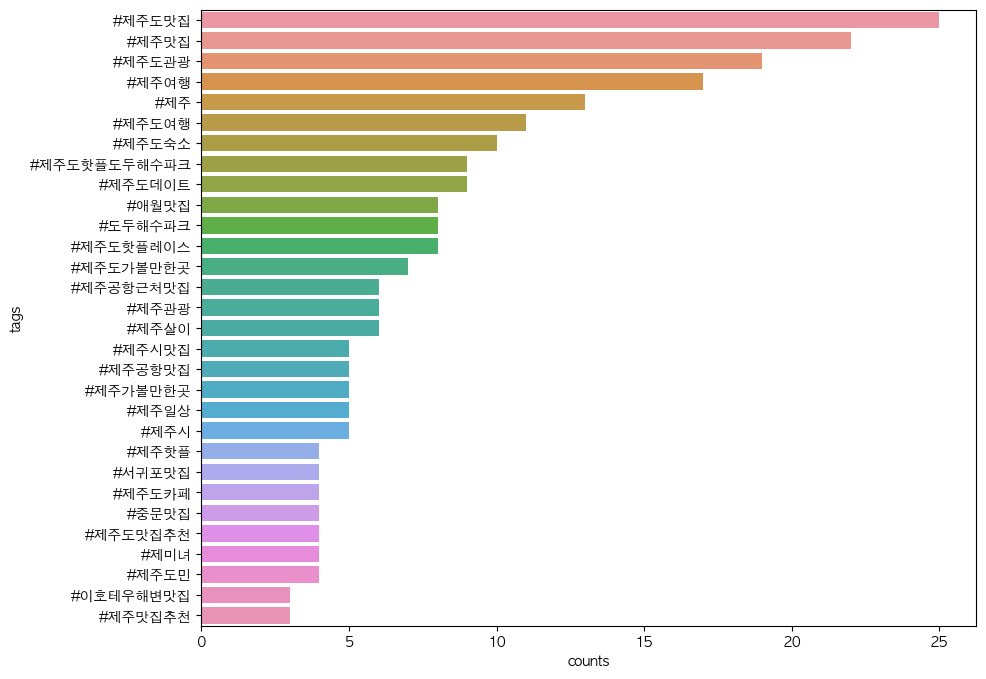

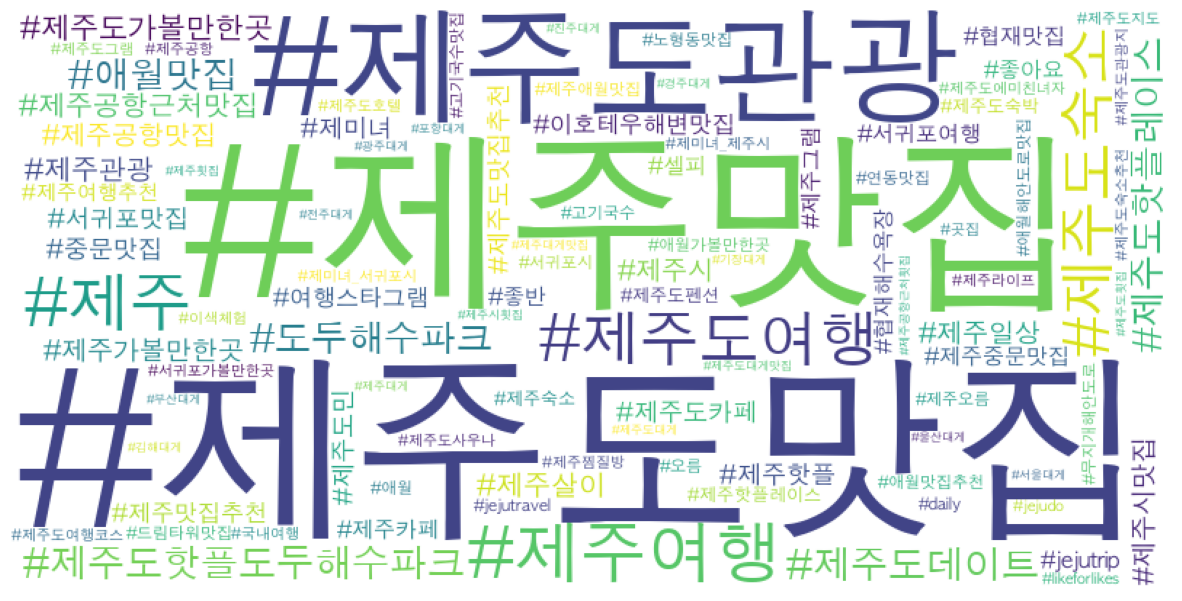

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import platform

raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

from collections import Counter
tag_counts = Counter(tags_total)

STOPWORDS = ['#일상',
             '#선팔',
             '#제주도',
             '#jeju',
             '#반영구',
             '#제주자연눈썹',
             '#서귀포눈썹문신',
             '#제주눈썹문신',
             '#소통',
             '#맞팔']

tag_total_selected = [ ]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font', family=font_name)

tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

# 차트 생성을 위한 코드
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

#워드 클라우드
if platform.system() == 'Windows':
    font_path = "c:Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400
                      ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/3_2_tag-wordcloud.png')